#Planning




To divide the work between the three people working on this project we first have to make a general idea of what needs to be done.

-Gather A set of cookie recipes
* Can include meta level data

-Create a Knowledgebase for the Inspiring Set
* define genotype

-Implement a recipe Generator
* https://pypi.org/project/geneticalgorithm/ For evolutionary algorithm
* define fenotype
* define fitness function
* define stopping condition
* define hyperparameters, crossover-, mutation-, selection methods
* Look at tutorial 5. We use its code as a starting point and change the code accordingly

-Present small cookbook
* Gather different presentation methods

#Gathering cookie recipes
Initially we want to find the cookie recipes dataset on the internet in website like kaggle, hugging face or code of paper, etc. However, due to the limited cookie recipe dataset on the internet, we are not able to find a proper dataset directly. Thus we scrawler from the website https://www.bbcgoodfood.com/recipes/collection/cookie-recipes to develop our own cookie recipes dataset.

Here is the code we write to scrawler a dataset.


In [ ]:
!pip install requests
!pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=efa5e7c5ee9d13e6d25b0b4ee40d5e6f039fdb2bf0b931a861fab7a28470af7c
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [ ]:
import requests
from bs4 import BeautifulSoup
import json

In [ ]:
# First find all the links of content pages in main page
def get_cookie_recipe_urls(page_url):
    recipes = []
    for i in range(1,10):
        bbc_good_food_url = page_url + str(i)
        print(bbc_good_food_url)
        response = requests.get(bbc_good_food_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        recipe_elements = soup.find_all('a', class_='link d-block')
        for element in recipe_elements:
            recipes.append('https://www.bbcgoodfood.com' + element['href'] )
    return recipes

#create a knowledge base

In [ ]:
# search recipe on url page
def get_recipe(url):
    # If the recipe page exist. There may be other pages in the url collection like advertisement, etc.
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Get the recipe name
        name = soup.find('h1').text

        # Get the ingredients
        ingredients = []

        # In the a recipe page
        for li in soup.find_all('li', {'class': 'pb-xxs pt-xxs list-item list-item--separator'}):
            text = li.text.strip()
            # Find ingredients
            parts = text.split(' ')
            # Filter the ingredient strings
            amount_unit = parts[0]
            ingredient = ' '.join(parts[1:])
            # If the unit is tsp or tbsp, because they write as a seperate word
            try:
                if parts[1] == "tsp" or parts[1] =="tbsp":
                    amount = ''.join(filter(str.isdigit, amount_unit))
                    unit = ''.join(filter(str.isalpha, parts[1]))
                    ingredient = ' '.join(parts[2:])
                else:
                # Separate amount and unit
                    amount = ''.join(filter(str.isdigit, amount_unit))
                    unit = ''.join(filter(str.isalpha, amount_unit))
            except:
                pass
            # If the number contains friction characters
            try:
                a = int(amount_unit[0])
            except:
                a = 0

            if '½' in amount_unit:
                amount = a + 0.5
            elif '¼' in amount_unit:
                amount = a + 0.25
            elif '¾' in amount_unit:
                amount = a+ 0.75

            try:
                if amount:
                    ingredients.append({ 'amount': int(amount), 'unit': unit, 'ingredient': ingredient })
            except:
                pass

        # Return the recipe in the desired format
        return {
            'name': name,
            'ingredients': ingredients
        }
    except requests.exceptions.HTTPError as http_err:
        pass
    except requests.exceptions.RequestException as err:
        pass


In [ ]:
bbc_good_food_url = "https://www.bbcgoodfood.com/search?q=Cookie+recipes&page="
cookie_urls = get_cookie_recipe_urls(bbc_good_food_url)
recipes = [get_recipe(url) for url in cookie_urls]

https://www.bbcgoodfood.com/search?q=Cookie+recipes&page=1
https://www.bbcgoodfood.com/search?q=Cookie+recipes&page=2
https://www.bbcgoodfood.com/search?q=Cookie+recipes&page=3
https://www.bbcgoodfood.com/search?q=Cookie+recipes&page=4
https://www.bbcgoodfood.com/search?q=Cookie+recipes&page=5
https://www.bbcgoodfood.com/search?q=Cookie+recipes&page=6
https://www.bbcgoodfood.com/search?q=Cookie+recipes&page=7
https://www.bbcgoodfood.com/search?q=Cookie+recipes&page=8
https://www.bbcgoodfood.com/search?q=Cookie+recipes&page=9


In [ ]:
#write data into json file
data = {
"cookie_recipes": recipes
}

# Write the results to a JSON file
with open('cookie_recipes.json', 'w') as f:
    json.dump(data, f, indent=2)

In [ ]:
json_file = 'cookie_recipes.json'

with open(json_file) as json_data:
    data = json.load(json_data)

In [ ]:
print(data)

{'cookie_recipes': [{'name': 'Vintage chocolate chip cookies', 'ingredients': [{'amount': 150, 'unit': 'g', 'ingredient': 'salted butter, softened'}, {'amount': 80, 'unit': 'g', 'ingredient': 'light brown muscovado sugar'}, {'amount': 80, 'unit': 'g', 'ingredient': 'granulated sugar'}, {'amount': 2, 'unit': 'tsp', 'ingredient': 'vanilla extract'}, {'amount': 1, 'unit': '', 'ingredient': 'large egg'}, {'amount': 225, 'unit': 'g', 'ingredient': 'plain flour'}, {'amount': 0, 'unit': 'tsp', 'ingredient': 'bicarbonate of soda'}, {'amount': 0, 'unit': 'tsp', 'ingredient': 'salt'}, {'amount': 200, 'unit': 'g', 'ingredient': 'plain chocolate chips or chunks'}]}, {'name': 'Chocolate fudge crinkle biscuits', 'ingredients': [{'amount': 60, 'unit': 'g', 'ingredient': 'cocoa powder, sieved'}, {'amount': 200, 'unit': 'g', 'ingredient': 'caster sugar'}, {'amount': 60, 'unit': 'ml', 'ingredient': 'vegetable oil'}, {'amount': 2, 'unit': '', 'ingredient': 'large eggs'}, {'amount': 180, 'unit': 'g', 'ing

Exampledata from tutorial

In [ ]:
data = """{
  "recipes": [
    {
      "name": "beef chilli",
      "ingredients": [
        { "amount": 150,  "unit": "g",  "ingredient": "minced beef" },
        { "amount": 100,  "unit": "g",  "ingredient": "onion" },
        { "amount": 100,  "unit": "ml", "ingredient": "water" },
        { "amount": 300,  "unit": "g",  "ingredient": "tomato" },
        { "amount": 5,    "unit": "g",  "ingredient": "chilli powder" },
        { "amount": 300,  "unit": "g",  "ingredient": "red kidney beans" }
      ]
    },
    {
      "name": "cabbage soup",
      "ingredients": [
        { "amount": 80,   "unit": "g",  "ingredient": "carrot" },
        { "amount": 100,  "unit": "g",  "ingredient": "onion" },
        { "amount": 150,  "unit": "g",  "ingredient": "tomato" },
        { "amount": 200,  "unit": "g",  "ingredient": "cabbage" },
        { "amount": 5,    "unit": "g",  "ingredient": "dry onion soup mix" },
        { "amount": 70,   "unit": "g",  "ingredient": "green bean" },
        { "amount": 150,  "unit": "ml", "ingredient": "tomato juice" },
        { "amount": 100,  "unit": "g",  "ingredient": "celery" },
        { "amount": 100,  "unit": "ml", "ingredient": "beef broth" }
      ]
    },
    {
      "name": "chicken soup",
      "ingredients": [
        { "amount": 5,    "unit": "g",  "ingredient": "butter" },
        { "amount": 50,   "unit": "g",  "ingredient": "onion" },
        { "amount": 30,   "unit": "g",  "ingredient": "celery" },
        { "amount": 600,  "unit": "ml", "ingredient": "chicken broth" },
        { "amount": 100,  "unit": "ml", "ingredient": "vegetable broth" },
        { "amount": 100,  "unit": "g",  "ingredient": "chicken breast" },
        { "amount": 50,   "unit": "g",  "ingredient": "egg noodle" },
        { "amount": 50,   "unit": "g",  "ingredient": "carrot" },
        { "amount": 5,    "unit": "g",  "ingredient": "basil" },
        { "amount": 5,    "unit": "g",  "ingredient": "oregano" }
      ]
    },
    {
      "name": "butternut squash soup",
      "ingredients": [
        { "amount": 800, "unit": "g",  "ingredient": "butternut squash"},
        { "amount": 100,  "unit": "g",  "ingredient": "onion"},
        { "amount": 50,   "unit": "g",  "ingredient": "carrot"},
        { "amount": 15,   "unit": "g",  "ingredient": "garlic"},
        { "amount": 10,   "unit": "g",  "ingredient": "thyme"},
        { "amount": 5,    "unit": "g",  "ingredient": "sage"},
        { "amount": 200,  "unit": "ml", "ingredient": "chicken broth"},
        { "amount": 1,    "unit": "g",  "ingredient": "salt"},
        { "amount": 1,    "unit": "g",  "ingredient": "pepper"},
        { "amount": 1,    "unit": "g",  "ingredient": "cayenne"},
        { "amount": 20,   "unit": "ml", "ingredient": "double cream"},
        { "amount": 5,    "unit": "g",  "ingredient": "parsley"}
      ]
    },
    {
      "name": "split pea soup",
      "ingredients": [
        { "amount": 200,  "unit": "g",  "ingredient": "split peas"},
        { "amount": 150,  "unit": "g",  "ingredient": "onion"},
        { "amount": 50,   "unit": "g",  "ingredient": "carrot"},
        { "amount": 50,   "unit": "g",  "ingredient": "celery"},
        { "amount": 10,   "unit": "g",  "ingredient": "garlic"},
        { "amount": 10,   "unit": "g",  "ingredient": "thyme"},
        { "amount": 10,   "unit": "g",  "ingredient": "ground ginger"},
        { "amount": 2,    "unit": "g",  "ingredient": "chili flakes"},
        { "amount": 500,  "unit": "ml", "ingredient": "chicken broth"},
        { "amount": 30,   "unit": "g",  "ingredient": "bacon"},
        { "amount": 1,    "unit": "g",  "ingredient": "salt"},
        { "amount": 1,    "unit": "g",  "ingredient": "black pepper"}
      ]
    },
    {
      "name": "corn chowder",
      "ingredients": [
        { "amount": 200,  "unit": "g",  "ingredient": "baby potatoes"},
        { "amount": 10,   "unit": "g",  "ingredient": "plain flour"},
        { "amount": 500,  "unit": "ml", "ingredient": "chicken broth"},
        { "amount": 200,  "unit": "g",  "ingredient": "sweetcorn"},
        { "amount": 5,    "unit": "g",  "ingredient": "thyme"},
        { "amount": 5,    "unit": "g",  "ingredient": "basil"},
        { "amount": 5,    "unit": "g",  "ingredient": "onion powder"},
        { "amount": 1,    "unit": "g",  "ingredient": "salt"},
        { "amount": 1,    "unit": "g",  "ingredient": "black pepper"},
        { "amount": 200,  "unit": "g",  "ingredient": "chicken"},
        { "amount": 50,   "unit": "g",  "ingredient": "cheese"},
        { "amount": 20,   "unit": "ml", "ingredient": "milk"},
        { "amount": 10,   "unit": "ml", "ingredient": "double cream"},
        { "amount": 10,   "unit": "g",  "ingredient": "bacon"},
        { "amount": 20,   "unit": "g",  "ingredient": "chives"}
      ]
    },
    {
      "name": "mulligatawny soup",
      "ingredients": [
        { "amount": 50,   "unit": "g",  "ingredient": "onion" },
        { "amount": 60,   "unit": "g",  "ingredient": "carrot" },
        { "amount": 60,   "unit": "g",  "ingredient": "celery" },
        { "amount": 30,   "unit": "g",  "ingredient": "butter" },
        { "amount": 5,    "unit": "g",  "ingredient": "flour" },
        { "amount": 5,    "unit": "g",  "ingredient": "curry powder" },
        { "amount": 500,  "unit": "ml", "ingredient": "chicken broth" },
        { "amount": 100,  "unit": "g",  "ingredient": "apple" },
        { "amount": 20,   "unit": "g",  "ingredient": "rice" },
        { "amount": 100,  "unit": "g",  "ingredient": "chicken breast" },
        { "amount": 60,   "unit": "ml", "ingredient": "double cream" }
      ]
    }
  ]
}"""

#implement a recipe generator

As a baseline for the model we started with the python model from tutorial 5, which we later changed to fit more and get better results for our specific dataset.

Import libraries + dataset

In [ ]:
import json
import pprint
import random
import math

#recipes = json.loads(data)['recipes'] # get tutorial data
recipes = data['cookie_recipes'] # get self made dataset

recipes = [i for i in recipes if i is not None]

Calculate the average number of ingredients. This is usefull to later determine the fitness of the generated recipes. Also getting the amount of recipes might give some insight.

In [ ]:
all_ingredients = []
avg_ingredient_count = 0
for recipe in recipes:
  avg_ingredient_count += len(recipe['ingredients'])
  all_ingredients.extend(recipe['ingredients'])

avg_ingredient_count = avg_ingredient_count/len(recipes)
print("avg number of ingredients ", avg_ingredient_count)
print("amount of recipes " ,len(recipes))

avg number of ingredients  8.193181818181818
amount of recipes  264


Calculate the proportion of how likely an ingredient is. Also calculate the average amount of an ingredient that is used in a recipe. Both will help later to calculate the fitness of a recipe.

In [ ]:
ingredient_count = {}
ingredient_amount = {}
for ingredient in all_ingredients:
  if ingredient['ingredient'] in ingredient_count:
    ingredient_count[ingredient['ingredient']] = ingredient_count[ingredient['ingredient']] + 1
    ingredient_amount[ingredient['ingredient']] = ingredient_amount[ingredient['ingredient']] + ingredient['amount']
  else:
    ingredient_count[ingredient['ingredient']] = 1
    ingredient_amount[ingredient['ingredient']] = ingredient['amount']

ingredient_amount[ingredient['ingredient']] = ingredient_amount[ingredient['ingredient']] / ingredient_count[ingredient['ingredient']]

ingredient_proportion = ingredient_count
for key in ingredient_count:
  ingredient_proportion[key] = ingredient_count[key] / len(recipes)

print(ingredient_proportion)
print(ingredient_amount)

{'salted butter, softened': 0.03787878787878788, 'light brown muscovado sugar': 0.022727272727272728, 'granulated sugar': 0.007575757575757576, 'vanilla extract': 0.4015151515151515, 'large egg': 0.10606060606060606, 'plain flour': 0.42424242424242425, 'bicarbonate of soda': 0.1590909090909091, 'salt': 0.03787878787878788, 'plain chocolate chips or chunks': 0.003787878787878788, 'cocoa powder, sieved': 0.015151515151515152, 'caster sugar': 0.23106060606060605, 'vegetable oil': 0.030303030303030304, 'large eggs': 0.045454545454545456, 'baking powder': 0.1590909090909091, 'icing sugar': 0.25, 'butter, softened': 0.13636363636363635, 'soft brown sugar, golden caster sugar, or ideally half of each': 0.003787878787878788, 'egg': 0.05303030303030303, ' plain flour (see tip below)': 0.003787878787878788, ' baking powder': 0.007575757575757576, 'chocolate chips or chopped chocolate': 0.003787878787878788, 'egg yolk': 0.041666666666666664, 'wholemeal flour': 0.01893939393939394, 'porridge oats'

Initialize population

In [ ]:
population_size = 20

population = random.choices(recipes, k=population_size)

fitness function: The fitness function is based on three different components.

1.   How likely it is an ingredient is used, the proportion an ingredient is used over all recipes.  
2.   The amount of an ingredient that is normally used.
3.   The number of different ingredients in a recipe.

First, the proportion is used to give a small starting value. This makes sure more important ingredients are more likely to appear such as butter and flour. Recipes must also have some less likely ingredients to make a cookie unique, this is why the proportion only counts for a small portion of the overal fitness.

Then for each ingredient, the amount is calculated into the formula. Pre-knowledges on cookies dictates that this is the most important part. Too much or too little of a single thing and the cookie might fall appart or become too hard. We use a logarithmic scale to detemine what is too much or too litle.
Now we have a baseline value for each recipe.

To get the final fitness value we only want to make sure the amount of ingedients used comes down to a normal amount. cookie recipes that are far off from the average amount will get a negative multiplier to make sure this happens.








In [ ]:
def evaluate_recipes(recipes):
  for r in recipes:

    r['fitness'] = 0
    for ingredient in r['ingredients']:

      value = ingredient_proportion[ingredient['ingredient']]
      avg_amount = ingredient_amount[ingredient['ingredient']]
      delta = abs(avg_amount - ingredient['amount'])

      if avg_amount == 0:
        r['fitness'] = 0
      else:
        multiplier =  1 / (avg_amount + (delta) / (avg_amount))
        r['fitness'] =  r['fitness'] + value +  abs(math.log(multiplier))
        #print(value, abs(math.log(multiplier)))


    delta = abs(len(r['ingredients']) - avg_ingredient_count)
    amount_of_ingredient_fitness = (avg_ingredient_count - delta) / avg_ingredient_count
    r['fitness'] =  r['fitness'] * amount_of_ingredient_fitness
    r['fitness'] = int(r['fitness'])

The original population is evaluated.

In [ ]:
evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

pprint.PrettyPrinter(indent=2, depth=2).pprint(population)


[ {'fitness': 48, 'ingredients': [...], 'name': 'Rocky road'},
  {'fitness': 45, 'ingredients': [...], 'name': 'Cinnamon cookies'},
  { 'fitness': 42,
    'ingredients': [...],
    'name': 'Snowy owl Christmas tree biscuits'},
  {'fitness': 42, 'ingredients': [...], 'name': 'Freezer biscuits'},
  {'fitness': 42, 'ingredients': [...], 'name': 'Funny face cookies'},
  {'fitness': 42, 'ingredients': [...], 'name': 'Funny face cookies'},
  {'fitness': 41, 'ingredients': [...], 'name': 'Lime cheesecake'},
  {'fitness': 41, 'ingredients': [...], 'name': 'Malt chocolate cheesecake'},
  { 'fitness': 38,
    'ingredients': [...],
    'name': 'Next level chocolate chip cookies'},
  {'fitness': 37, 'ingredients': [...], 'name': 'Caption cookies'},
  {'fitness': 35, 'ingredients': [...], 'name': 'Lemon drizzle scones'},
  {'fitness': 35, 'ingredients': [...], 'name': 'Favourite biscuit cupcakes'},
  {'fitness': 32, 'ingredients': [...], 'name': 'Empire biscuits'},
  { 'fitness': 30,
    'ingredien

Get a single individual from given recipes. recipes with a higher fitness are more likely to be selected.


In [ ]:
def select_recipe(recipes):
  sum_fitness = sum([recipe['fitness'] for recipe in recipes])
  f = random.randint(0, sum_fitness)
  for recipe in recipes:
    if f < recipe['fitness']:
      return recipe
    f -= recipe['fitness']
  return recipes[-1]

crossover from the tutorial model. Generates one ofspring from two parents randomly split once in each ingredient. This type of crossover is called one-point crossover.

In [ ]:
recipe_number = 1

def crossover_recipes(r1, r2):
  global recipe_number
  p1 = random.randint(1, len(r1['ingredients'])-1)
  p2 = random.randint(1, len(r2['ingredients'])-1)
  r1a = r1['ingredients'][0:p1]
  r2b = r2['ingredients'][p2:-1]
  r = dict()
  r['name'] = "recipe {}".format(recipe_number)
  recipe_number += 1
  r['ingredients'] = r1a + r2b
  return r

Mutation from the tutorial model.
Gives three possible outcomes per recipe:


1.   Change the amount of an ingredient that is used in a recipe
2.   Add a random ingredient
3.   remove a random ingredient



In [ ]:
def mutate_recipe(r):
  m = random.randint(0, 3)
  if m == 0:
    i = random.randint(0, len(r['ingredients'])-1)
    r['ingredients'][i] = r['ingredients'][i].copy()
    r['ingredients'][i]['amount'] += math.floor(r['ingredients'][i]['amount'] * 0.1)
    r['ingredients'][i]['amount'] = max(1, r['ingredients'][i]['amount'])
  elif m == 1:
    j = random.randint(0, len(r['ingredients'])-1)
    r['ingredients'][j] = r['ingredients'][j].copy()
    r['ingredients'][j]['ingredient'] = random.choice(all_ingredients)['ingredient']
  elif m == 2:
    r['ingredients'].append(random.choice(all_ingredients).copy())
  else:
    if len(r['ingredients']) > 1:
      r['ingredients'].remove(random.choice(r['ingredients']))

Normalizing the recipe from the tutorial model. Makes sure the final recipe has a correct portion size.

In [ ]:
def normalise_recipe(r):
  unique_ingredients = dict()
  for i in r['ingredients']:
    if i['ingredient'] in unique_ingredients:
      n = unique_ingredients[i['ingredient']]
      n['amount'] += i['amount']
    else:
      unique_ingredients[i['ingredient']] = i.copy()
  r['ingredients'] = list(unique_ingredients.values())

  sum_amounts = sum([i['amount'] for i in r['ingredients']])
  scale = 1000 / sum_amounts
  for i in r['ingredients']:
    i['amount'] = max(1, math.floor(i['amount'] * scale))

getting a new generation of recipes using selection, crosover and mutation according to the tutorial model.

In [ ]:
def generate_recipes(size, population):
  R = []
  while len(R) < size:
    r1 = select_recipe(population)
    r2 = select_recipe(population)
    r = crossover_recipes(r1, r2)
    mutate_recipe(r)
    normalise_recipe(r)
    R.append(r)
  evaluate_recipes(R)
  return R

Selection method to choose new generation according to the tutorial model. Picks highest fitness individuals.

In [ ]:
def select_population(P, R):
  R = sorted(R, reverse = True, key = lambda r: r['fitness'])
  P = P[0:len(P)//2] + R[0:len(R)//2]
  P = sorted(P, reverse = True, key = lambda r: r['fitness'])
  return P

example main training loop from tutorial model. produces 1000 generations.


In [ ]:

population = random.choices(recipes, k=population_size)
evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

max_fitnesses = []
min_fitnesses = []
for i in range(1000):
  R = generate_recipes(population_size, population)
  population = select_population(population, R)
  max_fitnesses.append(population[0]['fitness'])
  min_fitnesses.append(population[-1]['fitness'])

example training progress from tutorial model.

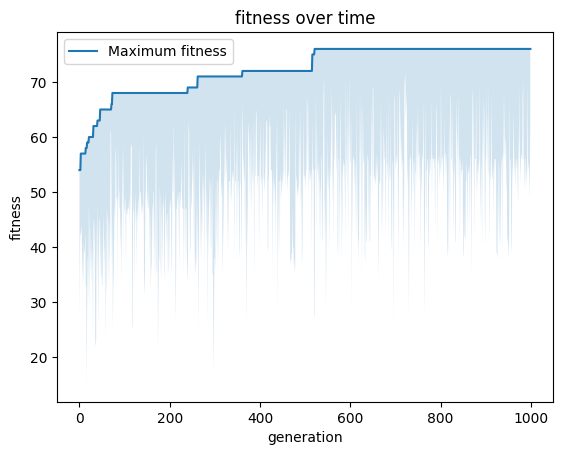

In [ ]:
import matplotlib.pyplot as plt

x  = range(1000)
plt.plot(x, max_fitnesses, label="Maximum fitness")
plt.fill_between(x, min_fitnesses, max_fitnesses, alpha=0.2)
plt.plot()

plt.xlabel("generation")
plt.ylabel("fitness")
plt.title("fitness over time")
plt.legend()
plt.show()

Final recipe

Run 1000 generations. recipes will look more like an average recipe due to the evaluation method. Will most likely result in a good cookie but might lack uniqueness.

In [ ]:
population_size = 20

population = random.choices(recipes, k=population_size)
evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

max_fitnesses = []
min_fitnesses = []
for i in range(1000):
  R = generate_recipes(population_size, population)
  population = select_population(population, R)
  max_fitnesses.append(population[0]['fitness'])
  min_fitnesses.append(population[-1]['fitness'])

pprint.PrettyPrinter(indent=2, depth=3).pprint(population[0])


{ 'fitness': 74,
  'ingredients': [ {'amount': 1, 'ingredient': 'butter, softened', 'unit': 'g'},
                   { 'amount': 1,
                     'ingredient': 'light brown soft sugar',
                     'unit': 'g'},
                   { 'amount': 1,
                     'ingredient': 'soft brown sugar',
                     'unit': 'tsp'},
                   {'amount': 1, 'ingredient': 'plain flour', 'unit': 'tsp'},
                   {'amount': 1, 'ingredient': 'caster sugar', 'unit': 'tsp'},
                   { 'amount': 4,
                     'ingredient': 'plain flour, plus extra for dusting',
                     'unit': 'g'},
                   {'amount': 1, 'ingredient': 'icing sugar', 'unit': 'g'},
                   { 'amount': 1,
                     'ingredient': 'self-raising flour',
                     'unit': 'tsp'},
                   { 'amount': 994,
                     'ingredient': ' plain flour (see tip below)',
                     'unit': 'g'}],
  '

Run 100 generations. Recipes can get some unique ingredients or proportions but will most likely give good results.

In [ ]:
population_size = 20

population = random.choices(recipes, k=population_size)
evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

max_fitnesses = []
min_fitnesses = []
for i in range(100):
  R = generate_recipes(population_size, population)
  population = select_population(population, R)
  max_fitnesses.append(population[0]['fitness'])
  min_fitnesses.append(population[-1]['fitness'])

pprint.PrettyPrinter(indent=2, depth=3).pprint(population[0])


{ 'fitness': 69,
  'ingredients': [ { 'amount': 22,
                     'ingredient': 'butter, softened',
                     'unit': 'g'},
                   { 'amount': 48,
                     'ingredient': 'golden caster sugar',
                     'unit': 'g'},
                   { 'amount': 108,
                     'ingredient': 'soft light brown sugar',
                     'unit': 'g'},
                   {'amount': 1, 'ingredient': 'golden syrup', 'unit': 'tbsp'},
                   { 'amount': 395,
                     'ingredient': 'plain flour, plus extra for dusting',
                     'unit': 'g'},
                   {'amount': 145, 'ingredient': 'cocoa powder', 'unit': 'g'},
                   {'amount': 125, 'ingredient': 'plain flour', 'unit': 'g'},
                   {'amount': 76, 'ingredient': 'caster sugar', 'unit': 'g'},
                   {'amount': 77, 'ingredient': 'double cream', 'unit': 'g'}],
  'name': 'recipe 41266'}


Run 10 generations. Recipes have high variaty in ingredients and proportions. Will have a high likelyhood in resulting in bad cookies but can also result in good and really unique ones.

In [ ]:
population_size = 20

population = random.choices(recipes, k=population_size)
evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

max_fitnesses = []
min_fitnesses = []
for i in range(10):
  R = generate_recipes(population_size, population)
  population = select_population(population, R)
  max_fitnesses.append(population[0]['fitness'])
  min_fitnesses.append(population[-1]['fitness'])

pprint.PrettyPrinter(indent=2, depth=3).pprint(population[0])


{ 'fitness': 67,
  'ingredients': [ { 'amount': 33,
                     'ingredient': 'plain flour, plus extra for dusting',
                     'unit': 'g'},
                   {'amount': 111, 'ingredient': 'caster sugar', 'unit': 'g'},
                   {'amount': 122, 'ingredient': 'butter, melted', 'unit': 'g'},
                   { 'amount': 154,
                     'ingredient': 'light brown soft sugar',
                     'unit': 'g'},
                   { 'amount': 76,
                     'ingredient': 'golden caster sugar',
                     'unit': 'g'},
                   { 'amount': 1,
                     'ingredient': 'vanilla extract',
                     'unit': 'tsp'},
                   { 'amount': 342,
                     'ingredient': 'self-raising flour',
                     'unit': 'g'},
                   {'amount': 44, 'ingredient': 'cocoa powder', 'unit': 'g'},
                   {'amount': 114, 'ingredient': 'plain flour', 'unit': 'g'}],
  'name':

In [ ]:
# More recipes
population_size = 20

population = random.choices(recipes, k=population_size)
evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

max_fitnesses = []
min_fitnesses = []
for i in range(10):
  R = generate_recipes(population_size, population)
  population = select_population(population, R)
  max_fitnesses.append(population[0]['fitness'])
  min_fitnesses.append(population[-1]['fitness'])

pprint.PrettyPrinter(indent=2, depth=3).pprint(population[5])


{ 'fitness': 60,
  'ingredients': [ { 'amount': 362,
                     'ingredient': 'golden caster sugar',
                     'unit': 'ml'},
                   {'amount': 120, 'ingredient': 'double cream', 'unit': 'ml'},
                   {'amount': 2, 'ingredient': 'egg yolks', 'unit': ''},
                   {'amount': 67, 'ingredient': 'sugar', 'unit': 'g'},
                   { 'amount': 86,
                     'ingredient': 'milk chocolate, chopped',
                     'unit': 'g'},
                   { 'amount': 156,
                     'ingredient': 'self-raising flour',
                     'unit': 'g'},
                   {'amount': 1, 'ingredient': 'icing sugar', 'unit': 'tbsp'},
                   {'amount': 70, 'ingredient': 'plain flour', 'unit': 'g'},
                   {'amount': 84, 'ingredient': 'caster sugar', 'unit': 'g'},
                   { 'amount': 50,
                     'ingredient': 'unsalted butter, softened',
                     'unit': 'g'}],


In [ ]:
# More recipes
population_size = 20

population = random.choices(recipes, k=population_size)
evaluate_recipes(population)
population = sorted(population, reverse = True, key = lambda r: r['fitness'])

max_fitnesses = []
min_fitnesses = []
for i in range(100):
  R = generate_recipes(population_size, population)
  population = select_population(population, R)
  max_fitnesses.append(population[0]['fitness'])
  min_fitnesses.append(population[-1]['fitness'])

pprint.PrettyPrinter(indent=2, depth=3).pprint(population[19])

{ 'fitness': 37,
  'ingredients': [ { 'amount': 16,
                     'ingredient': 'light brown soft sugar',
                     'unit': 'g'},
                   { 'amount': 21,
                     'ingredient': 'plain flour, plus extra for dusting',
                     'unit': 'g'},
                   { 'amount': 354,
                     'ingredient': 'self-raising flour',
                     'unit': 'g'},
                   {'amount': 79, 'ingredient': 'butter, melted', 'unit': 'g'},
                   { 'amount': 419,
                     'ingredient': 'unsalted butter, at room temperature',
                     'unit': 'g'},
                   {'amount': 108, 'ingredient': 'plain flour', 'unit': 'g'}],
  'name': 'recipe 44382'}


#Present cookbook


Initial ideas:

1. Present the generated recipe by AI-generated pictures, this could be the estimated outcome of the cookie, for example, a cookie made with milk may be whiter in color compared with the ones made with water. This can be achieved with proper prompting to some LLMs, for example, DALLE3 or stable dufusion. However, one possible threat to this approach is that we need to teach the LLMs to understand the request. And meanwhile, some recipes generated may be very similar, which means the content genenrated for the cookbook may also be similar. We need to think about how to avoid being unrecognizable.

2. Create an (interactive) website / or local page that people can scroll. The page could contain pictures generated in idea 1 and could also be manually created if the book does not contains too much items. This can make the overall presentation of the book more realistic and authentic.

3. Create an estimated nutrition score for each of the recipe generated. Is is a common practice in real life to include a nutrition indicator for foods and recipes. Therefore, we could use LLMs to make an estimation of the recipes we generated and display together with the recipes. This can make the book more informative and detailed.

All above ideas are initial ones, and may subject to change with further development.

Given the limited time, we will proceed with idea 1 and 3, namely, the image generation and nutrition score estimation.

We utilize DALLE3 mounted inside the ChatGPT4 to conduct image generation. A complex set of prompts are written to enable the precise drawing. We further fine-tuned the prompts by solving the issues we discovered in the process.

Some first attempts are listed below. Some points need to be improved given the results. For example, in the first picture, the background of the cookie is a little bit distractive, making it not visually appealing. Also, there are texts in the picture, which makes it too complex.
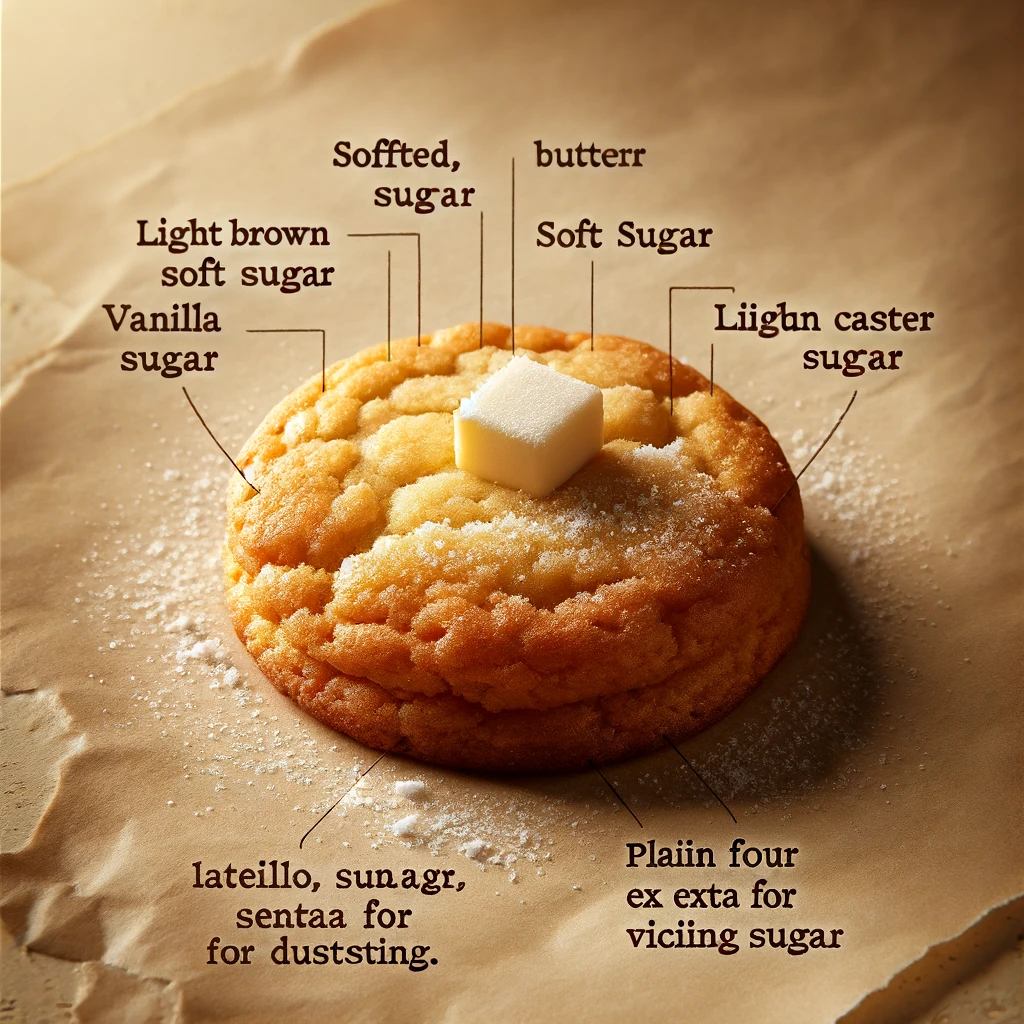

We improved it by writing detailed prompts to achieve a pure-colored background, with the color conveying the overall character of the cookie produced. For example, darker color for cookie with chocolate and lighting for cookie with milk. The outcome is better but still suffers from the text issue.

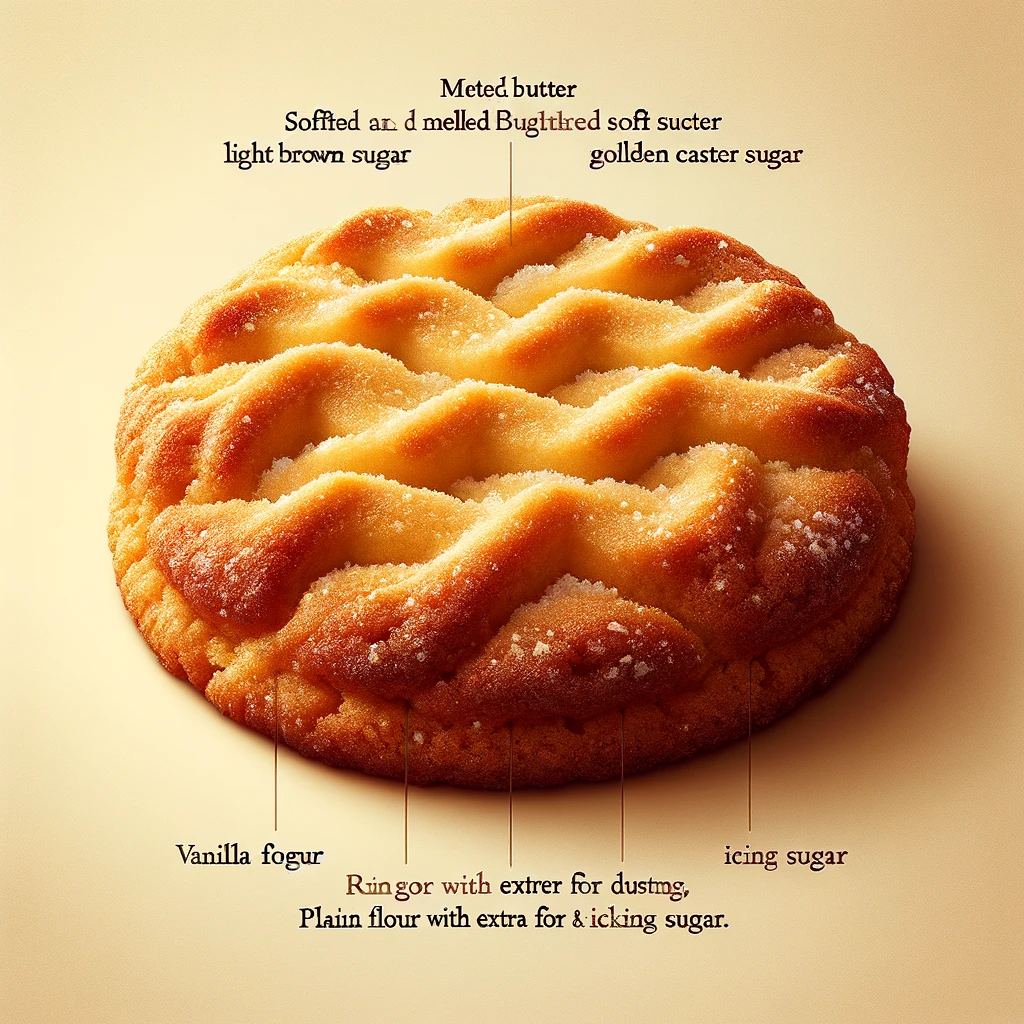

We further fine-tuned the prompts, and finally obtained a promising generation.

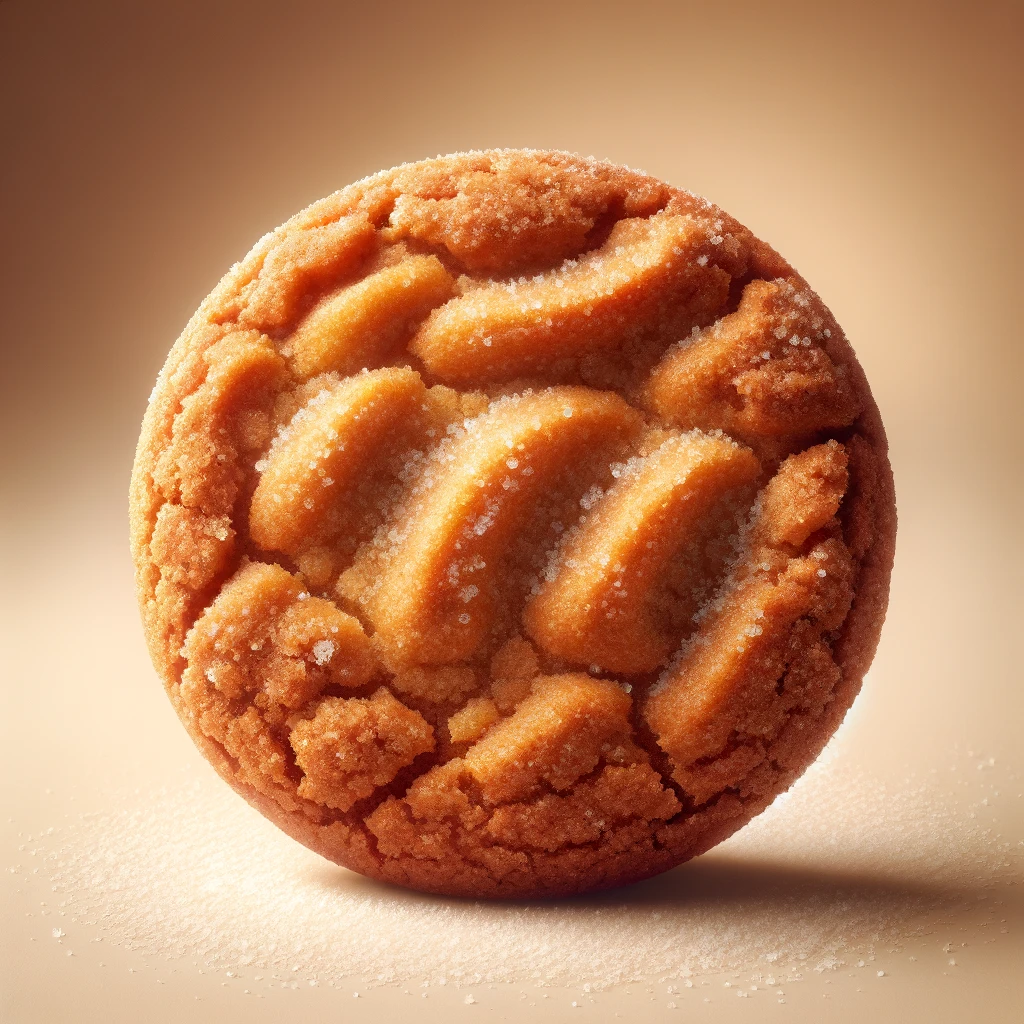

We developed a nutrition estimation tool with python, which use predetermined values to estimate the nutrition of the recipes we generated. The code piece can be found below.

In [ ]:
# Nutritional values per 100g for each ingredient
nutritional_values_per_100g = {
    "plain_flour": {"energy_kcal": 364, "fat_g": 1, "carbohydrates_g": 76, "protein_g": 10, "sugar_g": 0.3},
    "light_brown_soft_sugar": {"energy_kcal": 377, "fat_g": 0, "carbohydrates_g": 98, "protein_g": 0, "sugar_g": 98},
    "butter": {"energy_kcal": 717, "fat_g": 81, "carbohydrates_g": 0.1, "protein_g": 0.9, "sugar_g": 0.1},
    "self_raising_flour": {"energy_kcal": 334, "fat_g": 1.2, "carbohydrates_g": 70, "protein_g": 9.9, "sugar_g": 1.4},
}

# Ingredients in the new recipe with their amounts in grams
new_recipe_ingredients = {
    "plain_flour": 108 + 21,  # Sum of plain flour and extra for dusting
    "light_brown_soft_sugar": 16,
    "butter": 79 + 419,  # Sum of melted butter and unsalted butter at room temperature
    "self_raising_flour": 354,
}

# Total weight of the new recipe in grams
new_total_weight = sum(new_recipe_ingredients.values())

# Calculate total nutritional values for the new recipe
new_total_nutrition = {
    "energy_kcal": 0,
    "fat_g": 0,
    "carbohydrates_g": 0,
    "protein_g": 0,
    "sugar_g": 0
}

for ingredient, amount in new_recipe_ingredients.items():
    new_total_nutrition["energy_kcal"] += nutritional_values_per_100g[ingredient]["energy_kcal"] * (amount / 100)
    new_total_nutrition["fat_g"] += nutritional_values_per_100g[ingredient]["fat_g"] * (amount / 100)
    new_total_nutrition["carbohydrates_g"] += nutritional_values_per_100g[ingredient]["carbohydrates_g"] * (amount / 100)
    new_total_nutrition["protein_g"] += nutritional_values_per_100g[ingredient]["protein_g"] * (amount / 100)
    new_total_nutrition["sugar_g"] += nutritional_values_per_100g[ingredient]["sugar_g"] * (amount / 100)

# Calculate nutritional values per 100g of the new recipe
new_nutrition_per_100g = {key: (value / new_total_weight) * 100 for key, value in new_total_nutrition.items()}

print(new_nutrition_per_100g)


{'energy_kcal': 529.8796389167502, 'fat_g': 41.01484453360081, 'carbohydrates_g': 36.310732196589775, 'protein_g': 5.258575727181544, 'sugar_g': 2.1585757271815447}


The nutrition score generated for the cookie is listed below:

Nutrition per 100 gram

Energy: 529.9 kcal

Fat: 41.0 g

Carbohydrates: 36.3 g

Protein: 5.3 g

Sugar: 2.2 g

We decide to proceed with the above generation ideas for more recipes.

We decide to give every cookie a name to show our love for them. Of course, this is achieved with some help from generative LLMs. The name is expected to reveal the unique character of each cookie.

For example, Golden Butter Bliss, and Midnight Cocoa Dream.

After further experimenting, we decided to add a background story for each of the cookies we crafted. This is achieved with ChatGPT4 with specially made prompts.

For example, the background story of the Golden Butter Bliss is the following:

"Crafted in a quaint countryside bakery, the Golden Butter Bliss Cookies are a family heirloom recipe passed down through generations. Originating from a small European village, these cookies blend traditional baking methods with the finest local ingredients. The golden hue is a nod to the amber fields surrounding the bakery, with each cookie capturing the essence of a warm, sun-kissed afternoon."

We believe a single PDF file can not illustrate the full attractiveness of the cookies baked, and therefore, a website is made specifically for the marketing of the cookies. The website architecture and design is manually accomplished. While the name and background story of the cookies are written by self-prompted ChatGPT4 as shown above.

We have founded the GA Bakery! Hooray!

Our website: https://free-4202558.webador.com/

We further tried to add the recipe ingredients to the introductions. These are currently displayed in each cookie's page.

# Reflection

When searching the dataset, we scan through a variety of recipes dataset. However, most of the datasets are collections of all types of food. In order to train the model, there should have a certain and enough amount of data. We discoverd that on the recipe websites there are a vast quantity of cookie recipe collections.

We collect around 500 cookie recipes to form our dataset for initial populations. Our data quality is relatively good. But there are still some shortage of the raw data. First of all, the friction in the raw data is shown as char, even though we filtered the common frictions char, but there could still have some char may not be able to be recognized. Second, the unit may be different. Some of the unit format is combine with numbers, some are seperate from numbers, this make the filtering harder. Lastly, the ingredient are too wide. Thus, in one result, there could be more ingredient in the same type but in different substances. For instance, there can be brown sugar, sugar, caster sugar all together.

For presenting the cookie recipes, we tried multiple approaches to pursuit a content-rich and attractive presentation. We built a website that people can interact with for better marketing. This is more content-creative than a standard PDF file. In addition to the LLM-powered cookie images which are generated by self-developed prompts which takes the recipe into consideration, we further gave each cookie a lovely name and an interesting background story. This is also achieved with LLMs. Nutrition scores are estimated and given to each cookie to make them more realist as if they actually exist.

There is one drawback in our attempts that needs to be noted, that LLMs are not good at producing precise images, for example, images with accurate numbers. We initially wish to create label-like images for each of the cookies, with the content being the nutrition scores. We tried multiple text-to-image models, including DALLE3 (ChatGPT4 and Microsoft Bing), StableDiffusion and Midjourney. However, all of them can not accurately print the label, as the output often is filled with spelling errors or value label mismatch. After many failed attempts, we are forced to give this idea up and use conventional text-only form to show the nutrition estimations.

In the future experiment, we hope to improve the data quilty first. Then try to add the procedure into training, where the model can generate a detailed cooking procedure of the recipe. Also, we hope that LLMs can learn to produce more accurate images instead of a general topic paintings as technology progresses, and we can integrate them to produce more creative and more lovely presented cookies.